In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!pwd

/content


In [5]:
!ls -al '/content/gdrive/My Drive/'

total 15403
-rw------- 1 root root 14443144 May  5 01:05  advanced_digits_model.h5
drwx------ 2 root root     4096 Nov 27 20:04  blog
drwx------ 2 root root     4096 Mar 23 10:18  Book
drwx------ 2 root root     4096 Feb 14  2018  code
drwx------ 2 root root     4096 Apr 18 20:35 'Colab Notebooks'
drwx------ 2 root root     4096 Apr 18 20:14  darknet
-rw------- 1 root root    46718 Dec 21 03:28  digits_357.jpg
-rw------- 1 root root  1248504 Jan 19 17:41  digits_model.h5
drwx------ 2 root root     4096 Feb 14  2018  icon
drwx------ 2 root root     4096 Feb 14  2018  img
drwx------ 2 root root     4096 Feb 15  2018  intro


In [0]:
# https://cvisiondemy.com/license-plate-detection-with-opencv-and-python/
import cv2
import numpy as np
import matplotlib.pyplot as plt

width: 523 pixels
height: 184 pixels
channels: 3


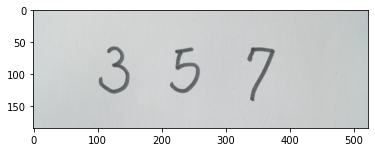

In [7]:
frame = '/content/gdrive/My Drive/digits_357.jpg'

img = cv2.imread(frame)
#plt.figure(figsize=(10,10))
plt.imshow(img);
print("width: {} pixels".format(img.shape[1]))
print("height: {} pixels".format(img.shape[0]))
print("channels: {}".format(img.shape[2]))

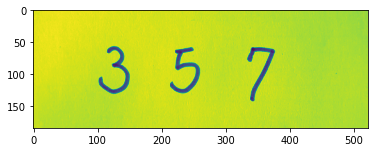

In [8]:
# hsv transform - value = gray image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(hsv)
plt.imshow(value)

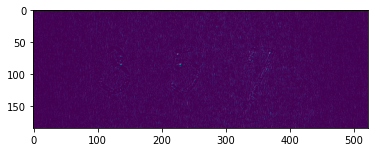

In [9]:
# kernel to use for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# applying topHat operations
topHat = cv2.morphologyEx(value, cv2.MORPH_TOPHAT, kernel)
plt.imshow(topHat)

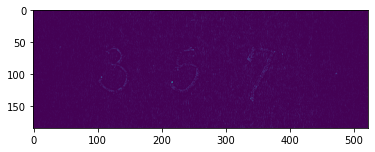

In [10]:
# applying blackHat operations
blackHat = cv2.morphologyEx(value, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackHat)

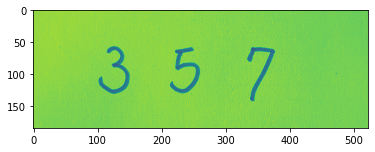

In [11]:
# add and subtract between morphological operations
add = cv2.add(value, topHat)
subtract = cv2.subtract(add, blackHat)
plt.imshow(subtract)

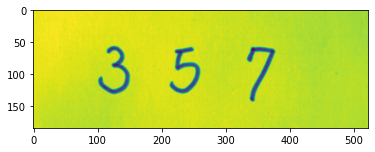

In [12]:
# applying gaussian blur on subtract image
blur = cv2.GaussianBlur(subtract, (5, 5), 0)
plt.imshow(blur)

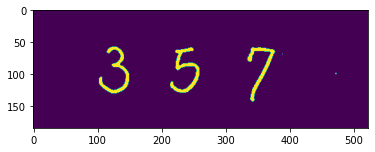

In [13]:
# thresholding
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 19, 9)
plt.imshow(thresh)

In [14]:
# cv2.findCountours() function changed from OpenCV3 to OpenCV4: now it have only two parameters instead of 3
cv2MajorVersion = cv2.__version__.split(".")[0]
print('openCV version : ', cv2MajorVersion)
# check for contours on thresh
if int(cv2MajorVersion) >= 4:
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
else:
    imageContours, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

openCV version :  4


334 378 58 143
214 260 58 129
103 150 57 130


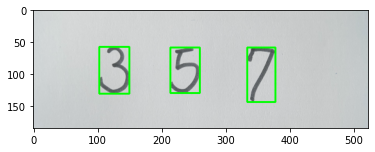

In [15]:
img_digits = []
img_origin = img.copy()
margin = 10

# loop to check if any (possible) contour is found
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  # Ignore if image is too small
  if w * h < 100: continue
  #Y and X [y-margin:y+h+margin, x-margin:x+w+margin]
  img_digits.append(img_origin[y-margin:y+h+margin, x-margin:x+w+margin])
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  print(x,  x+w, y, y+h)
plt.imshow(img)

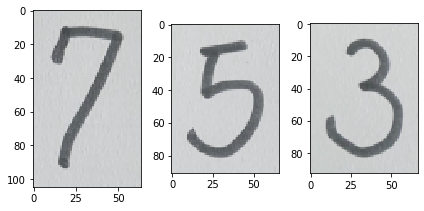

In [16]:
for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    plt.imshow(img_digits[i], cmap='Greys', interpolation='nearest')
plt.tight_layout()
plt.show() 

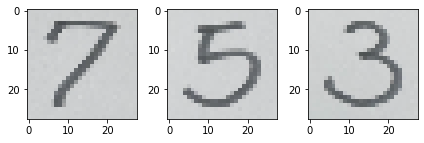

In [17]:
SZ = 28

for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    plt.imshow(cv2.resize(img_digits[i], (SZ, SZ)), cmap='Greys', interpolation='nearest')
plt.tight_layout()
plt.show() 

Load Deep Learning Model

In [20]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/gdrive/My Drive/advanced_digits_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0

[-1.7456939, 1.4164393, 6.0661736, -0.19205542, -2.4026732, -6.3415084, -0.340301, -0.7356438, 0.9038748, -3.2579048]
[-1.4767735, -4.577528, -6.9262676, 1.369479, -7.897896, 6.292841, -0.36127684, -2.9070246, -0.54695904, -0.039020874]
[-2.9227018, -3.9959693, -1.7993318, 8.92589, -8.831679, 1.1754054, -3.6873453, -5.9995885, 3.7791874, -1.7491486]


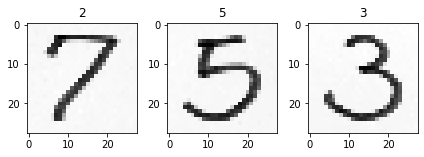

In [21]:
SZ = 28

for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    num = cv2.resize(img_digits[i], (SZ,SZ))[:,:,1]
    num = 255 - num #Reverse 
    num = num.astype('float32') / 255.
    plt.imshow(num, cmap='Greys', interpolation='nearest');
    result = model.predict(np.array([num]))
    result_number = np.argmax(result)
    plt.title(result_number)
    performance = [ val for val in result[0]]
    print(performance)
plt.tight_layout()
plt.show()